# **PROYECTO DE APRENDIZAJE AUTOMÁTICA**

**Por: Julián Tovar, Juliana Gomez, Melany Moreno y Nicolás Alvarado.**

# **0.Contexto**

* https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

* Detección de fraudes con tarjetas de crédito

* **Pregunta de negocio:** ¿Cómo podemos colaborar con las instituciones financieras para compartir información sobre fraudes y mejorar la seguridad en la industria?



# **1.Cargamos el DataFrame**

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd  # Pandas para la manipulación de datos en forma de DataFrames
import numpy as np   # Numpy para operaciones matemáticas eficientes
import seaborn as sns  # Seaborn para la visualización de datos
import matplotlib.pyplot as plt  # Matplotlib para la visualización de gráficos

import pickle  # Para serializar (guardar) y deserializar (cargar) objetos Python
import pylab as pl  # Utilizado para crear gráficos con Matplotlib
import xgboost as xgb  # XGBoost, una biblioteca para el aprendizaje de máquinas

from sklearn.neighbors import KNeighborsClassifier  # k-Vecinos más Cercanos de scikit-learn
from sklearn.model_selection import train_test_split  # División de datos de entrenamiento y prueba

from sklearn import linear_model  # Modelos de regresión lineal de scikit-learn
from sklearn.model_selection import learning_curve  # Curva de aprendizaje para evaluar rendimiento del modelo
from sklearn import model_selection, preprocessing  # Preprocesamiento de datos
from sklearn.linear_model import Ridge, Lasso  # Regresión Ridge y Lasso de scikit-learn
from sklearn.linear_model import LogisticRegression  # Regresión Logística de scikit-learn

from sklearn.metrics import classification_report  # Reporte de clasificación para evaluar modelos de clasificación
from sklearn.metrics import accuracy_score  # Métrica de precisión para modelos de clasificación
from sklearn.metrics import confusion_matrix  # Matriz de confusión para modelos de clasificación
from sklearn.metrics import roc_curve, auc  # Curva ROC y métricas relacionadas
from sklearn.metrics import precision_recall_curve  # Curva de precisión-recuperación

from sklearn.preprocessing import StandardScaler  # Escalado de características para estandarizar datos
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score  # Métricas de evaluación de modelos de clasificación

In [ ]:
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
frecuencias_absolutas = data["Class"].value_counts()

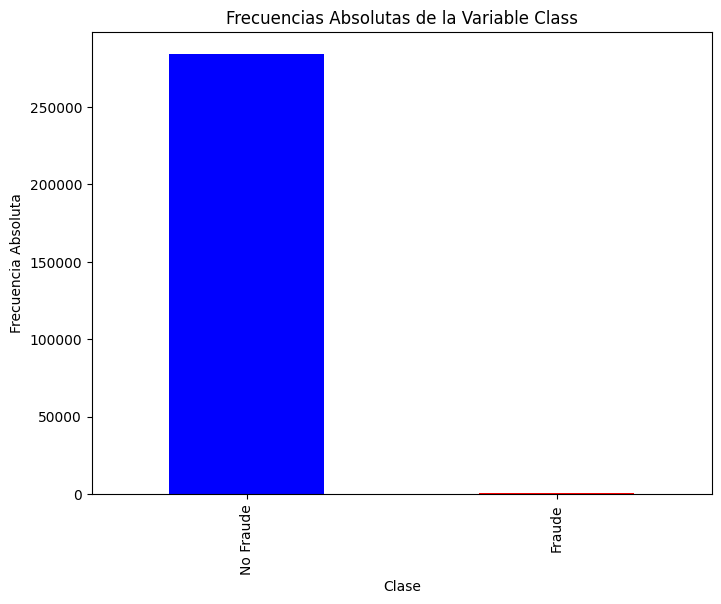

In [ ]:
plt.figure(figsize=(8, 6))
frecuencias_absolutas.plot(kind='bar', color=['blue', 'red'])
plt.title('Frecuencias Absolutas de la Variable Class')
plt.xlabel('Clase')
plt.ylabel('Frecuencia Absoluta')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

In [ ]:
frecuencias_relativas = data['Class'].value_counts(normalize=True)

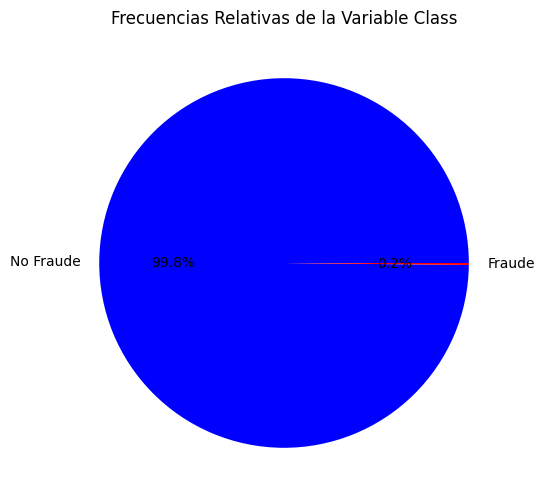

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(frecuencias_relativas, labels=['No Fraude', 'Fraude'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Frecuencias Relativas de la Variable Class')
plt.show()

# **2.Modelos**

## **2.2. Modelo de regresión logística**

In [ ]:
y = data['Class']
x = data.drop(['Class'], axis=1)
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=76)
model_log = LogisticRegression(solver='liblinear')
model_log.fit(x_train, y_train)
print('Score: {}'.format(model_log.score(x_test, y_test)))

Score: 0.9988588883817282


In [ ]:
x_train.shape

(227845, 30)

In [ ]:
x_test.shape

(56962, 30)

In [ ]:
y_pred = model_log.predict(x_test)
print('Ground Truth: '+str(np.array(y_test)[:20]))
print('Prediciones:  '+str(y_pred[:20]))

Ground Truth: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediciones:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
with open("model_log.pkl", "wb") as f:
    pickle.dump(model_log, f)

## **2.2. Modelo de vecinos más cercanos (kNN)**

In [ ]:
dataknn = data.copy()
dataknn['Vamount'] = StandardScaler().fit_transform(dataknn['Amount'].values.reshape(-1,1))
dataknn['Vtime'] = StandardScaler().fit_transform(dataknn['Time'].values.reshape(-1,1))

dataknn = dataknn.drop(['Time','Amount'], axis = 1)
dataknn.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [ ]:
yknn = dataknn['Class']
xknn = dataknn.drop(['Class'], axis=1)
xknn.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [ ]:
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(xknn, yknn, test_size=0.2, random_state=76)
model_knn = KNeighborsClassifier(n_neighbors=23) #Lo hace menos sensible a captar patrones y tendencias generales aunque nos da precisión (buen score)
model_knn.fit(x_train_knn, y_train_knn)
print('Score: {}'.format(model_knn.score(x_test_knn, y_test_knn))) #1 m 22 s ejecuntando

Score: 0.9992275552122467


In [ ]:
with open("model_knn.pkl", "wb") as f:
    pickle.dump(model_knn, f)

# **3.Validación**

## **3.1. Logístico**

In [ ]:
with open("/content/model_log.pkl","rb") as f:
    modelo = pickle.load(f)
print("Score del modelo original:", modelo.score(x_test, y_test))

Score del modelo original: 0.9988588883817282


### **3.1.1. Ajuste de umbral**

In [ ]:
def plot_precision_recall(model, x_test, y_test) :
    y_score = model.predict_proba(x_test)[:,1]
    p,r,t = precision_recall_curve(y_test,y_score)
    t=np.vstack([t.reshape([-1,1]),1])

    plt.plot(t,p, label='Precisión')
    plt.plot(t,r, label='Recall')
    plt.legend()
    plt.grid()

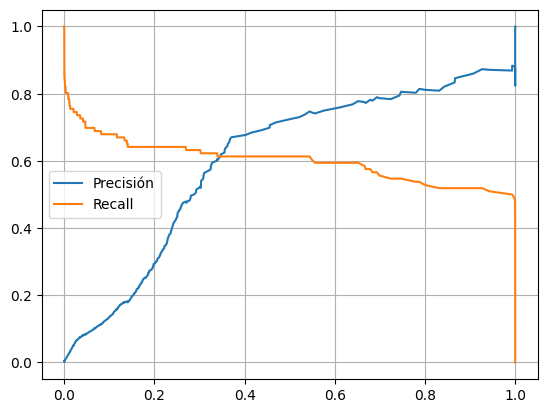

In [ ]:
plot_precision_recall(modelo, x_test, y_test)

### **3.1.2. Matriz de confusión**

In [ ]:
def plot_confussion_matrix(model, xtrain, ytrain, xtest, ytest, umbral=0.04):
    y_probs = model.predict_proba(xtest)
    y_pred = [int(p1 > umbral) for [p0, p1] in y_probs]
    conf = confusion_matrix(ytest, y_pred, normalize='all')
    conf = np.rot90(conf,2).T

    print ("     Accuracy:       %0.2f" %((conf[1,1]+conf[0,0])/(conf[1,1] + conf[0,1] + conf[0,0] + conf[1,0])))
    print ("     Precisión:      %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    print ("     Recall:         %0.2f" % (conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("     Especificidad:  %0.2f" % (conf[1, 1] / (conf[1, 1] + conf[0, 1])))

    plt.figure()
    sns.heatmap(conf, annot=True, cmap='Reds')
    plt.tight_layout()
    plt.ylabel('Predicción Modelo')
    plt.xlabel('Realidad')

     Accuracy:       0.98
     Precisión:      0.08
     Recall:         0.73
     Especificidad:  0.98


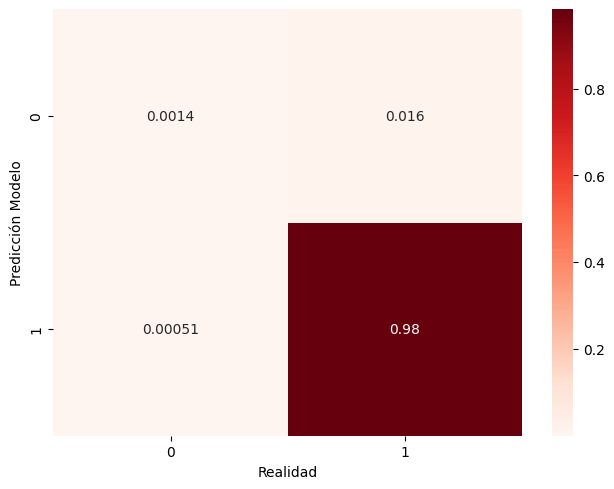

In [ ]:
plot_confussion_matrix(modelo ,x_train, y_train, x_test, y_test)

### **3.1.3. Curva ROC y AUC**

In [ ]:
def plot_roc_curve(model, x_test, y_test):
    y_score=model.predict_proba(x_test)[:,1]

    fpr, tpr, ths = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot([0,1],[0,1]) # Modelo Aleatorio
    plt.plot(fpr,tpr,color='green')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Curva ROC (AUC = ' + str(roc_auc)+ ')')

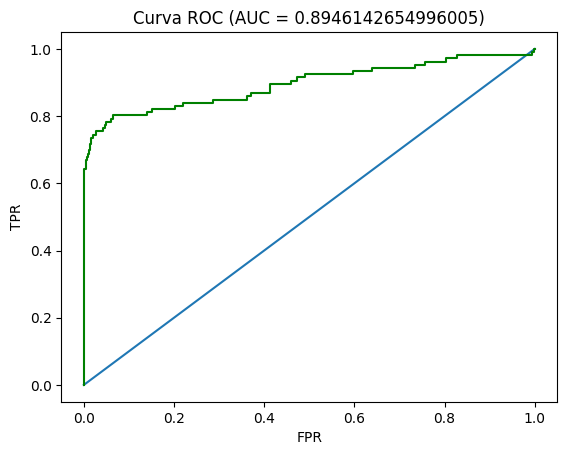

In [ ]:
plot_roc_curve(modelo, x_test, y_test)

## **3.2. Vecinos más cercanos**

In [ ]:
with open("/content/model_knn.pkl","rb") as f:
    modeloknn = pickle.load(f)
print("Score del modelo original:", modeloknn.score(x_test_knn, y_test_knn))

Score del modelo original: 0.9992275552122467


### **3.2.1. Métricas de rendimiento**

In [ ]:
knn_predicted_test_labels=modeloknn.predict(x_test_knn) #Almacena las predicciones

In [ ]:
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)

In [ ]:
print(knn_accuracy_score)
print(knn_precison_score)
print(knn_recall_score)

0.9992275552122467
0.8369565217391305
0.7264150943396226


# **4.Conclusiones**

* Para nuestra idea de negocio, el costo mayor está en los falsos negativos (Casos de fraude que el modelo no detectó).
* De modo que nuestra métrica a maximixar fue el Recall (De todos los casos positivos, cuántos acertó el modelo)
* El mejor resultado fue dado por el logístico.